## Attrition Risk Model

In [42]:
import pandas as pd
from random import randint, choice

# Define the number of rows in the dataset
num_rows = 100000

# List of states and branches
states = ['Tamil Nadu', 'Karnataka', 'Kerala', 'Andhra Pradesh']
branches = ['COMM', 'ENG', 'ELE', 'SEA', 'AVT', 'LOG']
vehicles = ['Two Wheeler', 'Four Wheeler']
medical_categories = ['S1A1', 'S2A2']

# Create a dictionary for generating the dataset
data = {
    'State': [choice(states) for _ in range(num_rows)],
    'Age_at_Retirement': [randint(32, 35) for _ in range(num_rows)],
    'Branch': [choice(branches) for _ in range(num_rows)],
    'Marriage': ['Yes' if randint(0, 1) == 1 else 'No' for _ in range(num_rows)],
    'Avg_Performance': [randint(60, 100) for _ in range(num_rows)],
    'Num_Children': [randint(0, 3) for _ in range(num_rows)],
    'Education': [choice(['12th', 'Graduation', 'Masters']) for _ in range(num_rows)],
    'Retired': ['Yes' if randint(0, 1) == 1 else 'No' for _ in range(num_rows)],
    'Type_of_Vehicle': [choice(vehicles) for _ in range(num_rows)],
    'Medical_Category': [choice(medical_categories) for _ in range(num_rows)],
    'Service_on_Ship': [randint(0, 15) for _ in range(num_rows)]
}

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file = 'dummy_dataset_100000.xlsx'
df.to_excel(excel_file, index=False, engine='openpyxl')
print(f'Dummy dataset saved to {excel_file}')


Dummy dataset saved to dummy_dataset_100000.xlsx


In [43]:
import pandas as pd

In [44]:
df = pd.read_excel('dummy_dataset_100000.xlsx')
df.head()

,State,Age_at_Retirement,Branch,Marriage,Avg_Performance,Num_Children,Education,Retired,Type_of_Vehicle,Medical_Category,Service_on_Ship
0,Kerala,32,SEA,No,68,2,Graduation,Yes,Two Wheeler,S2A2,8
1,Kerala,33,AVT,Yes,75,3,Masters,No,Two Wheeler,S1A1,6
2,Andhra Pradesh,33,ELE,Yes,79,2,Graduation,Yes,Four Wheeler,S2A2,9
3,Tamil Nadu,32,AVT,Yes,74,0,12th,No,Four Wheeler,S2A2,8
4,Kerala,34,ENG,No,80,2,12th,Yes,Four Wheeler,S2A2,3


In [45]:
df.Marriage = df.Marriage.apply(lambda x : 1 if x == 'Yes' else 0)
df.Retired = df.Retired.apply(lambda x : 1 if x == 'Yes' else 0)
df.Medical_Category = df.Medical_Category.apply(lambda x : 1 if x == 'S1A1' else 0)

In [46]:
df.head()

,State,Age_at_Retirement,Branch,Marriage,Avg_Performance,Num_Children,Education,Retired,Type_of_Vehicle,Medical_Category,Service_on_Ship
0,Kerala,32,SEA,0,68,2,Graduation,1,Two Wheeler,0,8
1,Kerala,33,AVT,1,75,3,Masters,0,Two Wheeler,1,6
2,Andhra Pradesh,33,ELE,1,79,2,Graduation,1,Four Wheeler,0,9
3,Tamil Nadu,32,AVT,1,74,0,12th,0,Four Wheeler,0,8
4,Kerala,34,ENG,0,80,2,12th,1,Four Wheeler,0,3


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Branch', ylabel='count'>

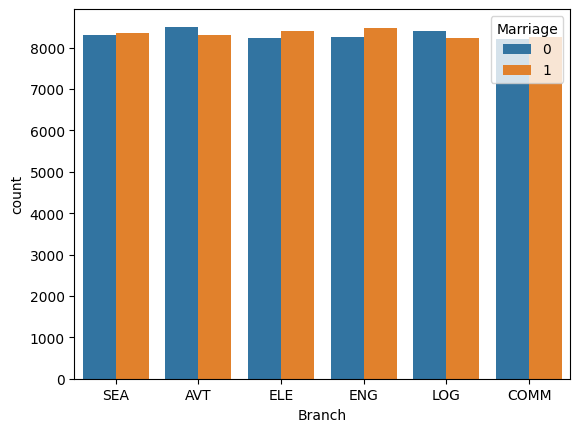

In [48]:
sns.countplot( x=df.Branch, hue=df.Marriage)

In [49]:
df.columns

Index(['State', 'Age_at_Retirement', 'Branch', 'Marriage', 'Avg_Performance',
       'Num_Children', 'Education', 'Retired', 'Type_of_Vehicle',
       'Medical_Category', 'Service_on_Ship'],
      dtype='object')

<Axes: xlabel='Branch', ylabel='count'>

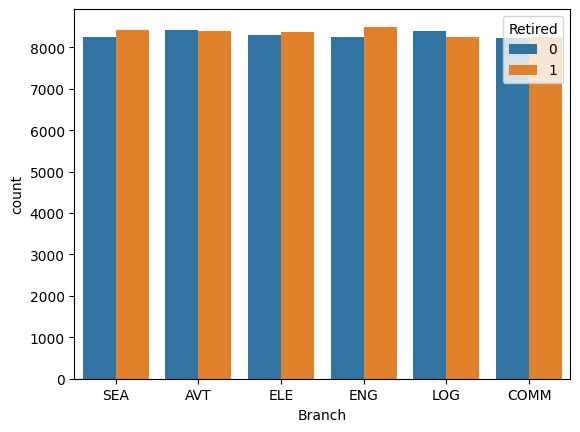

In [50]:
sns.countplot( x=df.Branch, hue=df.Retired)

<Axes: xlabel='State', ylabel='count'>

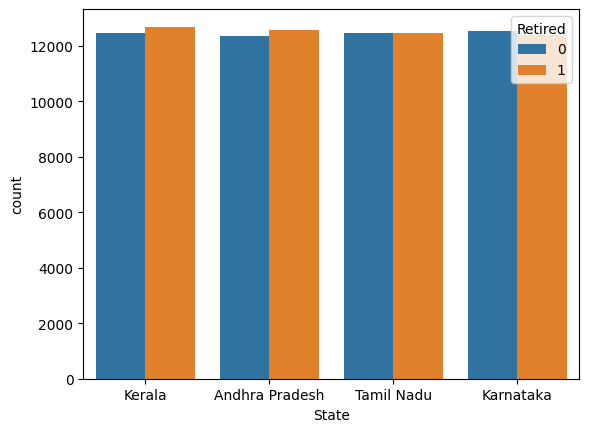

In [51]:
sns.countplot( x=df.State, hue=df.Retired)

In [52]:
df.describe()

,Age_at_Retirement,Marriage,Avg_Performance,Num_Children,Retired,Medical_Category,Service_on_Ship
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,33.495190,0.500460,79.907050,1.500640,0.50155,0.500560,7.494080
std,1.117519,0.500002,11.836886,1.118218,0.50000,0.500002,4.600795
min,32.000000,0.000000,60.000000,0.000000,0.00000,0.000000,0.000000
25%,32.000000,0.000000,70.000000,0.000000,0.00000,0.000000,4.000000
50%,33.000000,1.000000,80.000000,2.000000,1.00000,1.000000,7.000000
75%,34.000000,1.000000,90.000000,2.000000,1.00000,1.000000,11.000000
max,35.000000,1.000000,100.000000,3.000000,1.00000,1.000000,15.000000


In [53]:
df.isnull().count()

State                100000
Age_at_Retirement    100000
Branch               100000
Marriage             100000
Avg_Performance      100000
Num_Children         100000
Education            100000
Retired              100000
Type_of_Vehicle      100000
Medical_Category     100000
Service_on_Ship      100000
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   State              100000 non-null  object
 1   Age_at_Retirement  100000 non-null  int64 
 2   Branch             100000 non-null  object
 3   Marriage           100000 non-null  int64 
 4   Avg_Performance    100000 non-null  int64 
 5   Num_Children       100000 non-null  int64 
 6   Education          100000 non-null  object
 7   Retired            100000 non-null  int64 
 8   Type_of_Vehicle    100000 non-null  object
 9   Medical_Category   100000 non-null  int64 
 10  Service_on_Ship    100000 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 8.4+ MB


In [55]:
df.head()

,State,Age_at_Retirement,Branch,Marriage,Avg_Performance,Num_Children,Education,Retired,Type_of_Vehicle,Medical_Category,Service_on_Ship
0,Kerala,32,SEA,0,68,2,Graduation,1,Two Wheeler,0,8
1,Kerala,33,AVT,1,75,3,Masters,0,Two Wheeler,1,6
2,Andhra Pradesh,33,ELE,1,79,2,Graduation,1,Four Wheeler,0,9
3,Tamil Nadu,32,AVT,1,74,0,12th,0,Four Wheeler,0,8
4,Kerala,34,ENG,0,80,2,12th,1,Four Wheeler,0,3


In [56]:
dummpy1 = pd.get_dummies(df.Education, drop_first=True)
dummpy1.head()

,Graduation,Masters
0,True,False
1,False,True
2,True,False
3,False,False
4,False,False


In [57]:
df = pd.concat([df, dummpy1], axis=1)
df.head()

,State,Age_at_Retirement,Branch,Marriage,Avg_Performance,Num_Children,Education,Retired,Type_of_Vehicle,Medical_Category,Service_on_Ship,Graduation,Masters
0,Kerala,32,SEA,0,68,2,Graduation,1,Two Wheeler,0,8,True,False
1,Kerala,33,AVT,1,75,3,Masters,0,Two Wheeler,1,6,False,True
2,Andhra Pradesh,33,ELE,1,79,2,Graduation,1,Four Wheeler,0,9,True,False
3,Tamil Nadu,32,AVT,1,74,0,12th,0,Four Wheeler,0,8,False,False
4,Kerala,34,ENG,0,80,2,12th,1,Four Wheeler,0,3,False,False


In [58]:
df.Graduation = df.Graduation.apply(lambda x: 1 if x == True else 0)
df.Masters = df.Masters.apply(lambda x: 1 if x == True else 0)

In [59]:
df.Type_of_Vehicle.describe()

count           100000
unique               2
top       Four Wheeler
freq             50077
Name: Type_of_Vehicle, dtype: object

In [60]:
df.Type_of_Vehicle = df.Type_of_Vehicle.apply(lambda x: 1 if x == 'Four Wheeler' else 0)

In [61]:
df.head()

,State,Age_at_Retirement,Branch,Marriage,Avg_Performance,Num_Children,Education,Retired,Type_of_Vehicle,Medical_Category,Service_on_Ship,Graduation,Masters
0,Kerala,32,SEA,0,68,2,Graduation,1,0,0,8,1,0
1,Kerala,33,AVT,1,75,3,Masters,0,0,1,6,0,1
2,Andhra Pradesh,33,ELE,1,79,2,Graduation,1,1,0,9,1,0
3,Tamil Nadu,32,AVT,1,74,0,12th,0,1,0,8,0,0
4,Kerala,34,ENG,0,80,2,12th,1,1,0,3,0,0


In [62]:
df.drop(columns='Education', inplace=True)

In [63]:
df.drop(columns=['State', 'Branch'], inplace=True)

In [64]:
df.head()

,Age_at_Retirement,Marriage,Avg_Performance,Num_Children,Retired,Type_of_Vehicle,Medical_Category,Service_on_Ship,Graduation,Masters
0,32,0,68,2,1,0,0,8,1,0
1,33,1,75,3,0,0,1,6,0,1
2,33,1,79,2,1,1,0,9,1,0
3,32,1,74,0,0,1,0,8,0,0
4,34,0,80,2,1,1,0,3,0,0


In [65]:
X = df.drop('Retired', axis=1)
y = df['Retired']

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [68]:
d = {
    'X_train': [len(X_train)],
    'y_train':[ len(y_train)],
    'X_test': [len(X_test)],
    'y_test': [len(y_test)]
}

dataframe = pd.DataFrame(d)
dataframe

,X_train,y_train,X_test,y_test
0,80000,80000,20000,20000


In [69]:
X_train.head(5)

,Age_at_Retirement,Marriage,Avg_Performance,Num_Children,Type_of_Vehicle,Medical_Category,Service_on_Ship,Graduation,Masters
75220,34,0,70,3,0,1,3,0,0
48955,34,0,76,0,0,0,11,0,1
44966,34,1,91,3,1,1,2,0,0
13568,34,0,82,3,1,1,7,1,0
92727,32,0,78,1,0,1,7,0,1


In [70]:
scalar = StandardScaler()

X_train[['Age_at_Retirement', 'Avg_Performance', 'Num_Children','Service_on_Ship']] = scalar.fit_transform((X_train[['Age_at_Retirement', 'Avg_Performance', 'Num_Children','Service_on_Ship']]))
X_train.head()

,Age_at_Retirement,Marriage,Avg_Performance,Num_Children,Type_of_Vehicle,Medical_Category,Service_on_Ship,Graduation,Masters
75220,0.453195,0,-0.835756,1.341234,0,1,-0.977573,0,0
48955,0.453195,0,-0.328726,-1.341189,0,0,0.761030,0,1
44966,0.453195,1,0.938848,1.341234,1,1,-1.194899,0,0
13568,0.453195,0,0.178303,1.341234,1,1,-0.108272,1,0
92727,-1.335923,0,-0.159717,-0.447048,0,1,-0.108272,0,1


<Axes: >

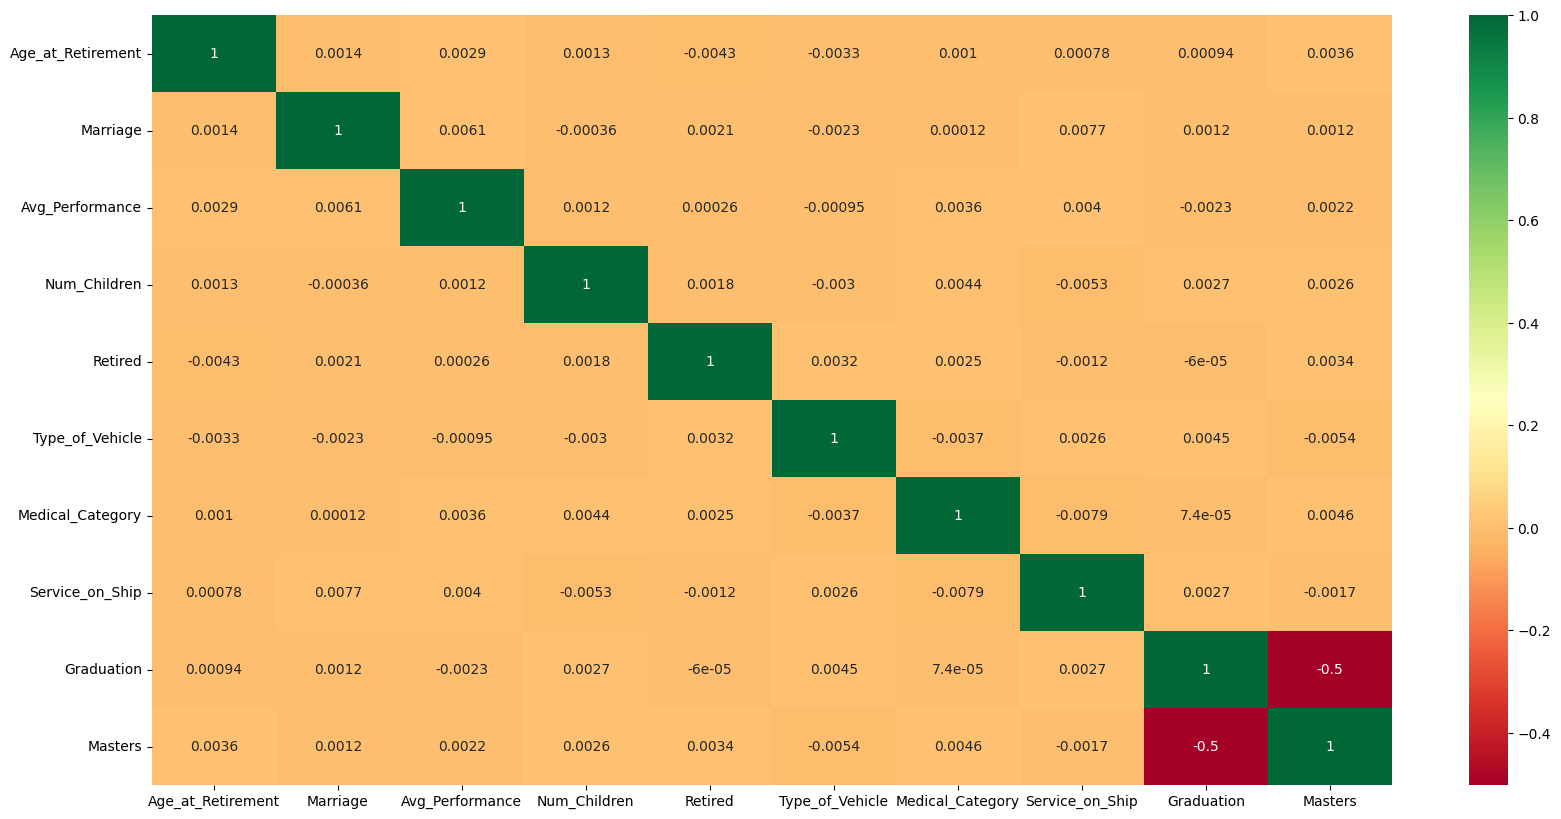

In [71]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr_model = LogisticRegression()
lr_model.fit (X_train, y_train)

LogisticRegression()

In [74]:
y_pred = lr_model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.50585

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the generated dummy dataset
excel_file = 'dummy_dataset_10000.xlsx'
data = pd.read_excel(excel_file)

# Encode categorical variables
label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])
data['Branch'] = label_encoder.fit_transform(data['Branch'])
data['Marriage'] = label_encoder.fit_transform(data['Marriage'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Type_of_Vehicle'] = label_encoder.fit_transform(data['Type_of_Vehicle'])
data['Medical_Category'] = label_encoder.fit_transform(data['Medical_Category'])

# Define features and target variable
X = data.drop('Retired', axis=1)
y = data['Retired']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model with hyperparameters
lr_model = LogisticRegression(
    penalty='l2',  # L2 regularization
    C=15,         # Inverse of regularization strength
    solver='lbfgs', # Optimization algorithm
    max_iter=50   # Maximum number of iterations
)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.48


C:\Users\naidu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
